In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [65]:
def inputNumerico(string):
    while(True):
        valor = float(input(string))
        if(isinstance(valor, float)):
            return valor
        else:
            print("Error, ingrese un valor numerico")

In [ ]:
def validacionCantidadR(string):
    while(True):
        r = int(input(string))
        if (r < 6):
            return r
        else:
            print("Ingrese un valor menor o igual a 5")

: 

In [67]:
def validacionIgualdad(string):
    while(True):
        igualdad = input(string)
        if igualdad=="<=":
            return 0
        elif igualdad==">=":
            return 1
        elif igualdad=="=":
            return 2
        else:
            print("Ingrese un signo valido")

In [68]:
def agregarRestriccion(R1,R2,I,C):
    if I==0:
        return [[R1,R2,C,I]]
    elif I==1:
        return [[-R1,-R2,-C,0]]
    elif I==2:
        return [[R1,R2,I,C],[-R1,-R2,-C,0]]

In [69]:
#Cantidad de restricciones
print("Ingrese cantidad de restricciones (5 o menos)")
r = validacionCantidadR("Valor: ")

Ingrese cantidad de restricciones (5 o menos)


In [70]:
#Funcion objetivo
print("Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2")
X1_0 = float(inputNumerico("Coeficiente de X1: "))
X2_0 = float(inputNumerico("Coeficiente de X2: "))

Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2


In [71]:
arregloRestricciones = []

for index in range(r):
    print("Ingrese los coeficientes para la restriccion R",index+1,": __X1 + __X2 (<=, >=, =) C")
    R1 = float(inputNumerico("Coeficiente de X1: "))
    R2 = float(inputNumerico("Coeficiente de X2: "))
    I = float(validacionIgualdad("Signo igualdad: "))
    C = float(inputNumerico("Coeficiente C: "))
    arregloRestricciones.extend(agregarRestriccion(R1,R2,I,C))
    
print(arregloRestricciones)
print(len(arregloRestricciones))

Ingrese los coeficientes para la restriccion R 1 : __X1 + __X2 (<=, >=, =) C
Ingrese los coeficientes para la restriccion R 2 : __X1 + __X2 (<=, >=, =) C
Ingrese los coeficientes para la restriccion R 3 : __X1 + __X2 (<=, >=, =) C
[[-2.0, -3.0, 0, -5.0], [3.0, 2.0, 0.0, 10.0], [-6.0, -0.0, 0, -2.0]]
3


In [158]:
size=7
rangoX=np.linspace(0,size,500)
rangoY=np.linspace(0,size,500)

In [159]:
arregloEcuacionesX = []
arregloEcuacionesY = []
for index in range(len(arregloRestricciones)):
    x = arregloRestricciones[index][0]
    print(x)
    y = arregloRestricciones[index][1]
    print(y)
    c = arregloRestricciones[index][3]
    print(c)
    if x==0:
        if y==0:
            print("reinicie")
        else:
            #0x+2y=6
            arregloEcuacionesY.append((c-x*rangoX)/y)
            print("---")
            print(arregloEcuacionesY)
            print("---")
    elif y==0:
        if x!=0:
            #2x+0y=8
            arregloEcuacionesX.append((c-0*rangoY)/x)
            print("---")
            print(arregloEcuacionesX)
            print("---")
    else:
        #2x+3y=4
        #3y=4-2x
        #y=(4-2x)/3
        arregloEcuacionesY.append((c-x*rangoX)/y)

Z = X1_0*rangoX/X2_0
print(len(arregloEcuacionesX))
print(len(arregloEcuacionesY))

-2.0
-3.0
-5.0
3.0
2.0
10.0
-6.0
-0.0
-2.0
---
[array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333

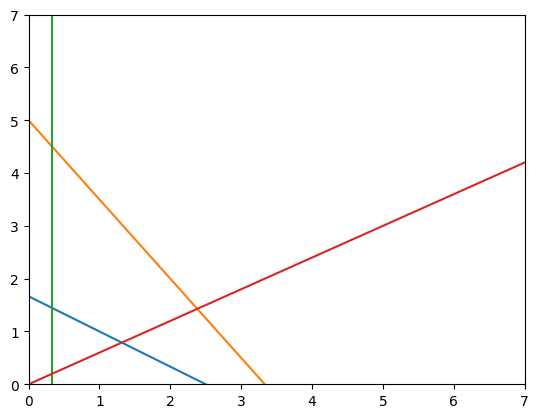

In [162]:
plt.axis([0,size,0,size])
for index in range(len(arregloEcuacionesY)):
    plt.plot(rangoX,  arregloEcuacionesY[index])
for index in range(len(arregloEcuacionesX)):
    plt.plot(arregloEcuacionesX[index], rangoY)
plt.plot(rangoX, Z)

In [ ]:
for ecuacion in arregloRestricciones:
    restic = Restriccion(ecuacion[0],ecuacion[1],ecuacion[2],ecuacion[3]) 